##**LSTM based Binary Classification of Anomilies in IOT data**



In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('/content/gdrive/My Drive/IoTID20.csv')

In [4]:
data.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [5]:
data.isnull().sum().sum()

0

In [6]:
data = data.drop(columns = ['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol','Timestamp', 'Cat', 'Sub_Cat','Fwd_PSH_Flags','Fwd_URG_Flags','Fwd_Byts/b_Avg','Fwd_Pkts/b_Avg','Fwd_Blk_Rate_Avg','Bwd_Byts/b_Avg','Bwd_Pkts/b_Avg','Bwd_Blk_Rate_Avg','Init_Fwd_Win_Byts','Fwd_Seg_Size_Min'])

In [7]:
data.Label.replace(['Anomaly', 'Normal'], [1, 0], inplace = True)

In [8]:
normalized_df = (data-data.min())/(data.max()-data.min())

In [9]:
normalized_df = normalized_df.dropna()

In [10]:
features = normalized_df.drop(columns=['Label']).to_numpy()
labels = normalized_df[['Label']].to_numpy()

In [11]:
features.shape, labels.shape

((625415, 66), (625415, 1))

In [12]:
x_train = features[:575783]
y_train = labels[:575783]

x_test = features[575783:]
y_test = labels[575783:]

In [13]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((575783, 66), (49632, 66), (575783, 1), (49632, 1))

In [14]:
x_train1 = x_train.reshape((575783, 1 , 66))
x_test1 = x_test.reshape((49632,1,66))
x_test1.shape , x_train1.shape

((49632, 1, 66), (575783, 1, 66))

In [ ]:
modelbinary = keras.Sequential([
              keras.layers.LSTM(128, input_shape=(1,66), return_sequences=True),
              keras.layers.LSTM(30,return_sequences=True),
              keras.layers.Dense(1,activation='sigmoid')         
])

In [ ]:
modelbinary.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = modelbinary.fit(x_train1, y_train, epochs = 5)

Epoch 1/5
17994/17994 [==============================] - 104s 5ms/step - loss: 0.0994 - accuracy: 0.9685
Epoch 2/5
17994/17994 [==============================] - 97s 5ms/step - loss: 0.0681 - accuracy: 0.9796
Epoch 3/5
17994/17994 [==============================] - 97s 5ms/step - loss: 0.0539 - accuracy: 0.9826
Epoch 4/5
17994/17994 [==============================] - 97s 5ms/step - loss: 0.0497 - accuracy: 0.9839
Epoch 5/5
17994/17994 [==============================] - 96s 5ms/step - loss: 0.0475 - accuracy: 0.9848


In [ ]:
loss,accuracy = modelbinary.evaluate(x_test1,y_test)
print("Loss: ", loss)
print('Accuracy: ',accuracy*100, '%')

1551/1551 [==============================] - 5s 3ms/step - loss: 0.0472 - accuracy: 0.9855
Loss:  0.047154493629932404
Accuracy:  98.54932427406311 %


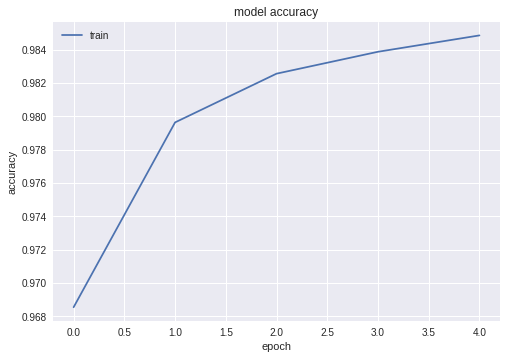

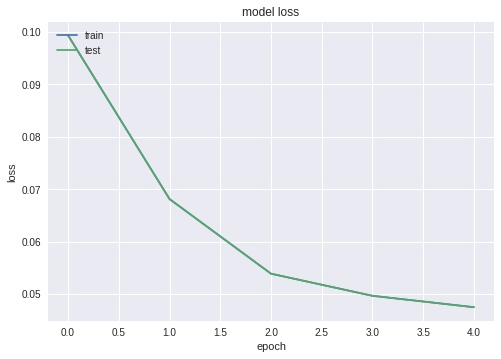

In [ ]:

plt.style.use('seaborn')


plt.figure()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_accuracy_'+db+'.png')

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_loss_'+db+'.png')

##**LSTM based MultiClass Classification of Anomilies in IOT data**

In [15]:
data2 = pd.read_csv('/content/gdrive/My Drive/IoTID20.csv')
data2 = data2.drop(columns = ['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol','Timestamp','Fwd_PSH_Flags','Fwd_URG_Flags','Fwd_Byts/b_Avg','Fwd_Pkts/b_Avg','Fwd_Blk_Rate_Avg','Bwd_Byts/b_Avg','Bwd_Pkts/b_Avg','Bwd_Blk_Rate_Avg','Init_Fwd_Win_Byts','Fwd_Seg_Size_Min'])
data2.Label.replace(['Anomaly', 'Normal'], [1, 0], inplace = True)
data2.Cat.replace(['Mirai', 'DoS','Scan','Normal','MITM ARP Spoofing'], [1,2,3,4,5], inplace = True)
data2.Sub_Cat.replace(['Mirai-Ackflooding', 'DoS-Synflooding','Scan Port OS','Mirai-Hostbruteforceg','Mirai-UDP Flooding', 'Mirai-HTTP Flooding','Normal', 'Scan Hostport', 'MITM ARP Spoofing'], [1,2,3,4,5,6,7,8,9], inplace = True)


In [16]:
normalized_df2 = (data2-data2.min())/(data2.max()-data2.min())

In [17]:
normalized_df2 = normalized_df2.dropna()

In [18]:
features2 = normalized_df2.drop(columns=['Label','Cat','Sub_Cat']).to_numpy()
labels2 = normalized_df2[['Label','Cat','Sub_Cat']].to_numpy()

In [19]:
x_train2 = features2[:575783]
y_train2 = labels2[:575783]

x_test2 = features2[575783:]
y_test2 = labels2[575783:]

In [20]:
x_train2.shape , x_test2.shape , y_train2.shape , y_test2.shape

((575783, 66), (49632, 66), (575783, 3), (49632, 3))

In [21]:
x_train21 = x_train2.reshape((575783, 1 , 66))
x_test21 = x_test2.reshape((49632,1,66))
y_train21 =  y_train2.reshape(575783,1,3)
y_test21 =  y_test2.reshape(49632,1,3)
x_test21.shape , x_train21.shape

((49632, 1, 66), (575783, 1, 66))

In [22]:
model2 = keras.Sequential([
              keras.layers.LSTM(128, input_shape=(1,66), return_sequences=True),
              keras.layers.LSTM(30,return_sequences=True),
              keras.layers.Dense(3,activation='softmax')       
])

In [23]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            99840     
                                                                 
 lstm_1 (LSTM)               (None, 1, 30)             19080     
                                                                 
 dense (Dense)               (None, 1, 3)              93        
                                                                 
Total params: 119,013
Trainable params: 119,013
Non-trainable params: 0
_________________________________________________________________


In [24]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model2.fit(x_train21,y_train21, epochs = 5)

Epoch 1/5
17994/17994 [==============================] - 103s 5ms/step - loss: 2.1932 - accuracy: 0.9359
Epoch 2/5
17994/17994 [==============================] - 96s 5ms/step - loss: 3.0629 - accuracy: 0.9360
Epoch 3/5
17994/17994 [==============================] - 95s 5ms/step - loss: 4.0295 - accuracy: 0.9360
Epoch 4/5
17994/17994 [==============================] - 97s 5ms/step - loss: 5.0269 - accuracy: 0.9360
Epoch 5/5
17994/17994 [==============================] - 93s 5ms/step - loss: 6.0069 - accuracy: 0.9360


In [26]:
loss,accuracy = model2.evaluate(x_test21,y_test21)
print("Loss: ", loss)
print('Accuracy: ',accuracy*100, '%')

1551/1551 [==============================] - 5s 3ms/step - loss: 6.5403 - accuracy: 0.9354
Loss:  6.540251731872559
Accuracy:  93.5384452342987 %


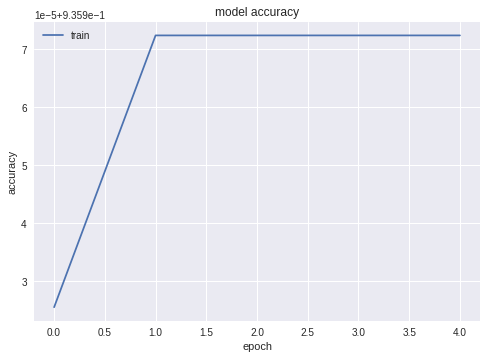

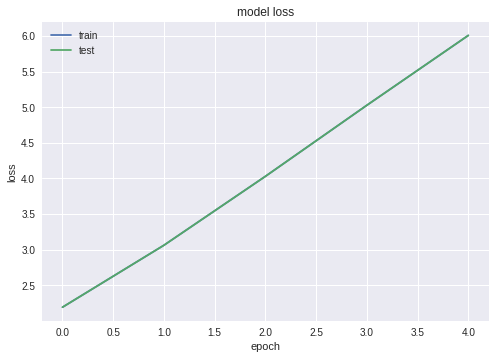

In [27]:

plt.style.use('seaborn')


plt.figure()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_accuracy_'+db+'.png')

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig(fname='model_loss_'+db+'.png')